<a href="https://colab.research.google.com/github/CathyGuang/Music-Genre-Identification/blob/main/extract_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import json
import os
import math
import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path='/content/drive/My Drive/Colab Notebooks/Music Genre Classification/data'

In [ ]:
#A little experiment with data
example_file = file_path + "/genres/blues/blues.00000.wav"

In [ ]:
signal, sample_rate = librosa.load(example_file)

In [ ]:
print(signal)

[ 0.00732422  0.01660156  0.00762939 ... -0.05560303 -0.06106567
 -0.06417847]


In [ ]:
print(sample_rate)

22050


In [ ]:
FIG_SIZE = (16,8)

Text(0.5, 1.0, 'Waveform')

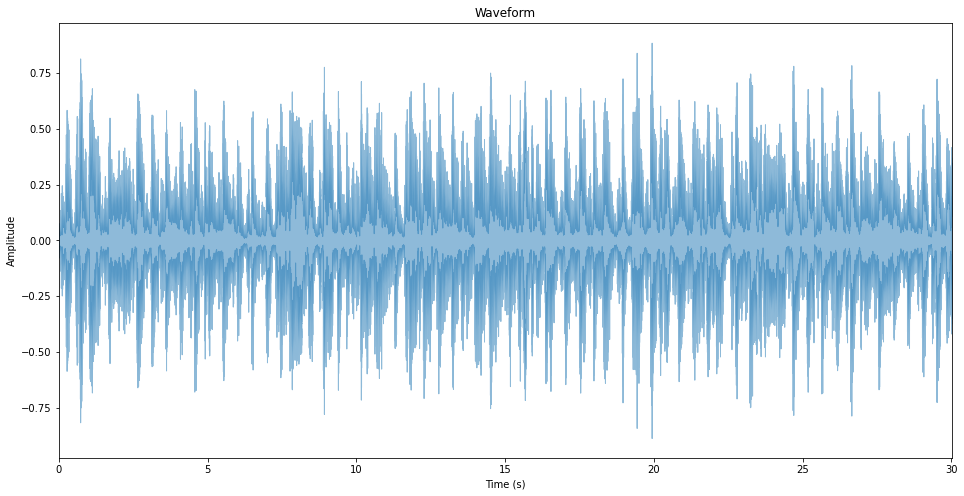

In [ ]:
plt.figure(figsize=FIG_SIZE)
librosa.display.waveplot(signal, sample_rate, alpha=0.5)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")

In [ ]:
hop_length = 512
n_fft = 2048

In [ ]:
MFCCs = librosa.feature.mfcc(signal, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)

Text(0.5, 1.0, 'MFCCs')

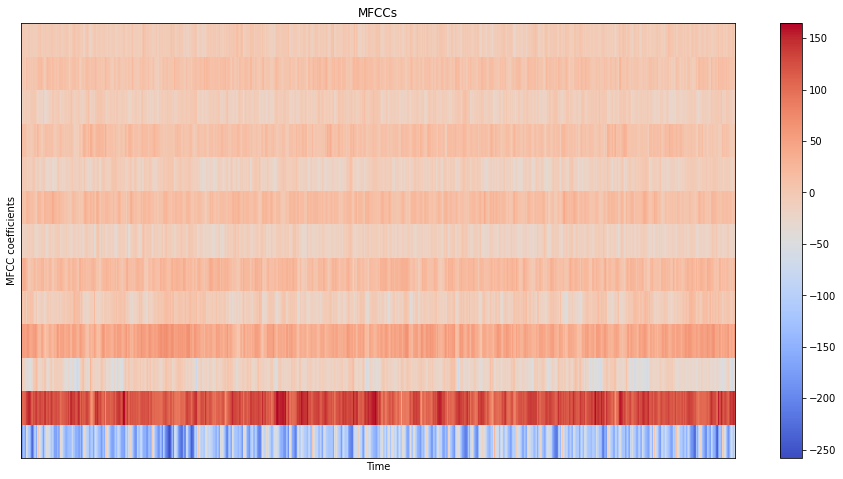

In [ ]:
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")

In [ ]:
DATASET_PATH = file_path + "/genres"
JSON_PATH = file_path + "/data.json"
SAMPLE_RATE = 22050 # custom
TRACK_DURATION = 30 # measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION

In [ ]:
import os
import math
import json

In [ ]:
def save_mfcc(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=5):
    """Extracts MFCCs from music dataset and saves them into a json file along with genre labels.
        """

    # dictionary to store mapping, labels, and MFCCs
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }

    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    # to calculate expected number of mfcc vectors per segment
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    # loop through all genre sub-folder
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        # ensure we're not at the root level
        if dirpath is not dataset_path:

            # save genre label in the mapping
            semantic_label = dirpath.split("/")[-1] # genre/blues => "blues"
            data["mapping"].append(semantic_label)
            print("\nProcessing: {}".format(semantic_label))

            # process all audio files in genre sub-dir
            for f in filenames:

                file_path = os.path.join(dirpath, f)
                signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)

                # process all segments of each file
                for d in range(num_segments):

                    # calculate start and finish sample for current segment
                    start = samples_per_segment * d
                    finish = start + samples_per_segment

                    # extract mfcc for this slice
                    mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                    mfcc = mfcc.T # transpose

                    # store only mfcc for segment if it has expected number of vectors
                    if len(mfcc) == num_mfcc_vectors_per_segment:
                        data["mfcc"].append(mfcc.tolist()) # turn to np array
                        data["labels"].append(i-1)
                        print("{}, segment:{}".format(file_path, d+1))

    # save MFCCs to json file
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)

In [ ]:
save_mfcc(DATASET_PATH, JSON_PATH, num_segments=10)

Streaming output truncated to the last 5000 lines.
/content/drive/My Drive/Colab Notebooks/Music Genre Classification/data/genres/reggae/reggae.00008.wav, segment:7
/content/drive/My Drive/Colab Notebooks/Music Genre Classification/data/genres/reggae/reggae.00008.wav, segment:8
/content/drive/My Drive/Colab Notebooks/Music Genre Classification/data/genres/reggae/reggae.00008.wav, segment:9
/content/drive/My Drive/Colab Notebooks/Music Genre Classification/data/genres/reggae/reggae.00008.wav, segment:10
/content/drive/My Drive/Colab Notebooks/Music Genre Classification/data/genres/reggae/reggae.00004.wav, segment:1
/content/drive/My Drive/Colab Notebooks/Music Genre Classification/data/genres/reggae/reggae.00004.wav, segment:2
/content/drive/My Drive/Colab Notebooks/Music Genre Classification/data/genres/reggae/reggae.00004.wav, segment:3
/content/drive/My Drive/Colab Notebooks/Music Genre Classification/data/genres/reggae/reggae.00004.wav, segment:4
/content/drive/My Drive/Colab Notebo